## Loan Default Prediction (Nigerian Fintech)
This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not a loan applicant will default or not..

i will be following this steps:
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## Problem Definition
In a statement,
> Given user inputs like Income, Loan amount and others, can we detect if the applicant will default or not

## Data
This dataset is synthetically generated to reflect typical loan applicants in the Nigerian financial ecosystem. It simulates customer information (income, employment status, credit score, etc.) and loan behavior (default or not) based on domain-inspired assumptions relevant to local banks and fintech companies.
> 💡 Note: This dataset is for educational purposes only and should not be used for production without proper validation and ethical review.

In [39]:
from xgboost import XGBClassifier


In [2]:
# import all the tools we need

# Regular EDA(exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Evaluation
> if we are able to reach about 95% accuracy that would be nice

## Features
This is where i will get different information about my data

## Load the Data

In [3]:
loan_df = pd.read_csv("nigerian_loan_default_data.csv")
loan_df.head()

,customer_id,age,gender,employment_status,monthly_income,loan_amount,loan_term,loan_purpose,credit_score,bvn_verified,previous_loans,previous_defaults,guarantor_available,region,defaulted
0,CUST00001,56,Male,Employed,133492,392048,9,Rent,651,1,1,0,0,Abuja,0
1,CUST00002,20,Male,Employed,135915,99094,18,Business,654,0,0,0,1,Ibadan,0
2,CUST00003,59,Female,Employed,142468,313009,3,Business,583,1,3,1,0,Abuja,0
3,CUST00004,31,Male,Employed,131992,57859,18,Rent,694,1,1,0,0,Enugu,0
4,CUST00005,53,Female,Self-employed,122644,218326,12,Travel,529,1,1,1,1,Kano,1


In [77]:
loan_df.loan_purpose.value_counts()

loan_purpose
Medical      312
Travel       311
Business     309
Education    287
Rent         281
Name: count, dtype: int64

In [78]:
loan_df.region.value_counts()

region
Ibadan           264
Enugu            256
Abuja            255
Port Harcourt    246
Kano             245
Lagos            234
Name: count, dtype: int64

In [4]:
loan_df.shape

(1500, 15)

## Exploratory Data Analysis

In [5]:
# Let's find out how many of each class there are
loan_df.defaulted.value_counts()

defaulted
0    851
1    649
Name: count, dtype: int64

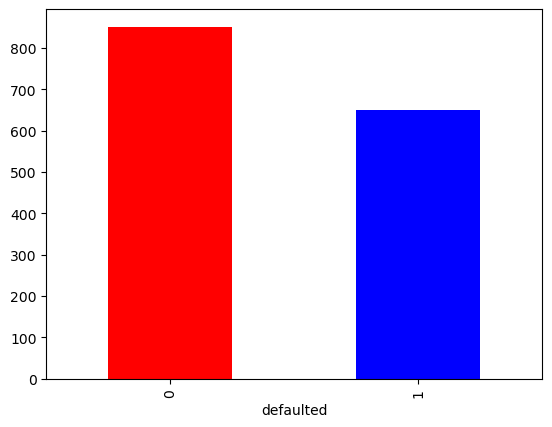

In [6]:
loan_df.defaulted.value_counts().plot(kind="bar", color=["red", "blue"])
plt.show()

## Comparison of loan default between male and female

In [7]:
## Compare defaulted column with gender column
pd.crosstab(loan_df.defaulted, loan_df.gender)


gender,Female,Male
defaulted,,
0,424,427
1,332,317


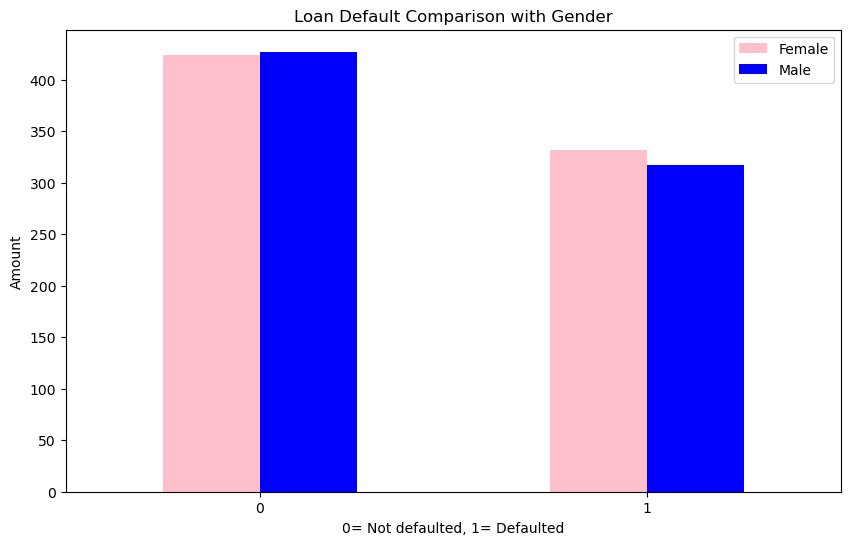

In [8]:
pd.crosstab(loan_df.defaulted, loan_df.gender).plot(kind="bar",
                                                    figsize=(10,6),
                                                    color=["pink","blue"])
plt.title("Loan Default Comparison with Gender")
plt.xlabel("0= Not defaulted, 1= Defaulted")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0); #Keep the labels on the x-axis vertical
plt.savefig("gender_default_plot.png")
plt.show()

## Comparison of monthly income and loan amount

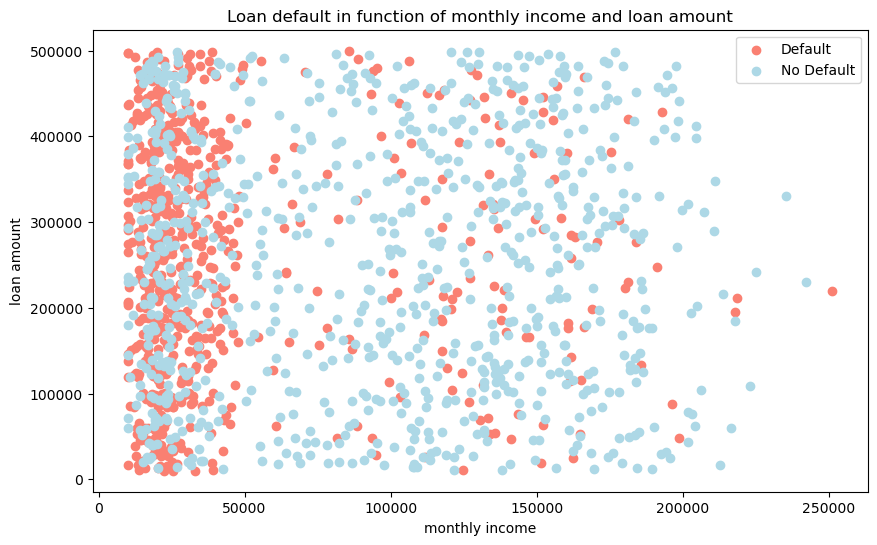

In [9]:
#create another figure
plt.figure(figsize=(10,6))

#start with positive examples
plt.scatter(loan_df.monthly_income[loan_df.defaulted==1],
            loan_df.loan_amount[loan_df.defaulted==1],
            c="salmon")
# Now for negative examples, we want them on the same plot, so we call plt again
plt.scatter(loan_df.monthly_income[loan_df.defaulted==0],
            loan_df.loan_amount[loan_df.defaulted==0],
            c="lightblue")

#Add some helpful info
plt.title("Loan default in function of monthly income and loan amount")
plt.xlabel("monthly income")
plt.legend(["Default", "No Default"])
plt.ylabel("loan amount");
plt.show()

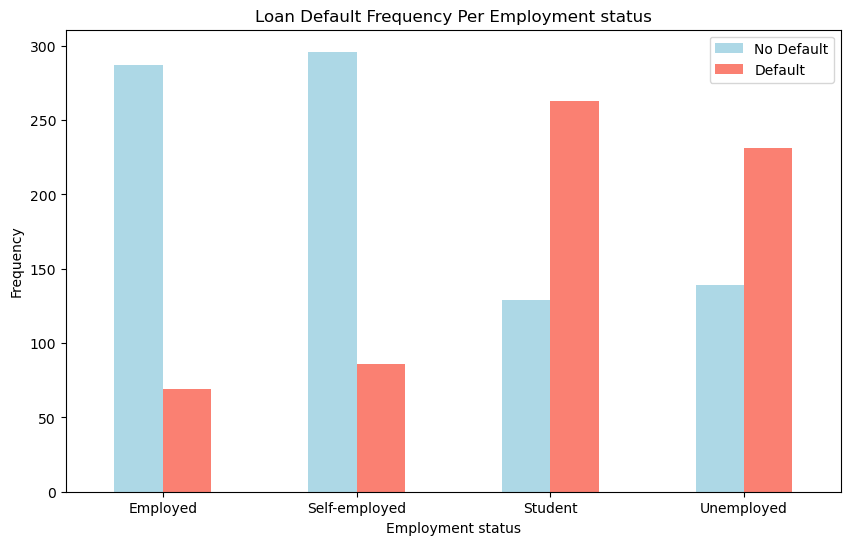

In [10]:
pd.crosstab(loan_df.employment_status,loan_df.defaulted).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["lightblue","salmon"])
plt.title("Loan Default Frequency Per Employment status")
plt.xlabel("Employment status")
plt.ylabel("Frequency")
plt.legend(["No Default", "Default"])
plt.xticks(rotation = 0);
plt.savefig("Employment-status.png")
plt.show()


In [11]:
## checking for missing values
loan_df.isna().sum()

customer_id            0
age                    0
gender                 0
employment_status      0
monthly_income         0
loan_amount            0
loan_term              0
loan_purpose           0
credit_score           0
bvn_verified           0
previous_loans         0
previous_defaults      0
guarantor_available    0
region                 0
defaulted              0
dtype: int64

## Age Distribution

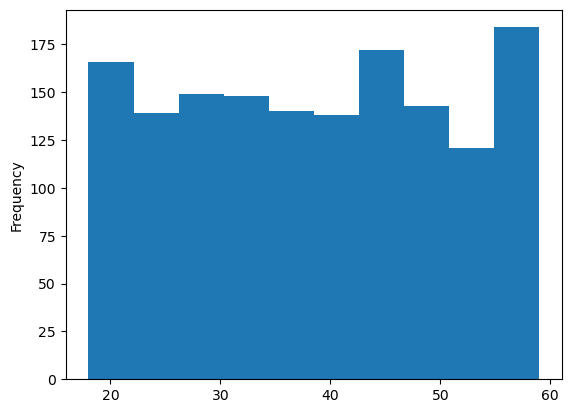

In [12]:
loan_df.age.plot.hist()
plt.show()

## MODELLING

In [13]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   customer_id          1500 non-null   object
 1   age                  1500 non-null   int64 
 2   gender               1500 non-null   object
 3   employment_status    1500 non-null   object
 4   monthly_income       1500 non-null   int64 
 5   loan_amount          1500 non-null   int64 
 6   loan_term            1500 non-null   int64 
 7   loan_purpose         1500 non-null   object
 8   credit_score         1500 non-null   int64 
 9   bvn_verified         1500 non-null   int64 
 10  previous_loans       1500 non-null   int64 
 11  previous_defaults    1500 non-null   int64 
 12  guarantor_available  1500 non-null   int64 
 13  region               1500 non-null   object
 14  defaulted            1500 non-null   int64 
dtypes: int64(10), object(5)
memory usage: 175.9+ KB


In [14]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [15]:
X = loan_df.drop(columns=['customer_id', 'defaulted']) 
y = loan_df['defaulted']


## Define Column Types

In [16]:
numeric_features = ['age', 'monthly_income', 'loan_amount', 'loan_term', 'credit_score',
                    'previous_loans', 'previous_defaults']
categorical_features = ['gender', 'employment_status', 'loan_purpose', 'region', 'bvn_verified', 'guarantor_available']

In [40]:
## Create Transformers
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Categorical: encode
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

## Build the Column Transformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])
## Define Models as Pipelines
models = {
    "Logistic Regression" :Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(max_iter=1000))
    ]),
    "Random Forest Classifier" :Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", RandomForestClassifier())
    ]),
    "KNN": Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', KNeighborsClassifier())
    ]),
    "XGBoost": Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
    ])
}

In [41]:
## Fit and Score function
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    
    for name, model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test,y_test)
    return model_scores


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [43]:
scores= fit_and_score(models,X_train, X_test, y_train, y_test)
print(scores)

C:\Users\Afolabi Ayomide\Desktop\sample_project_1\env\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:29:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


{'Logistic Regression': 0.72, 'Random Forest Classifier': 0.71, 'KNN': 0.69, 'XGBoost': 0.7033333333333334}


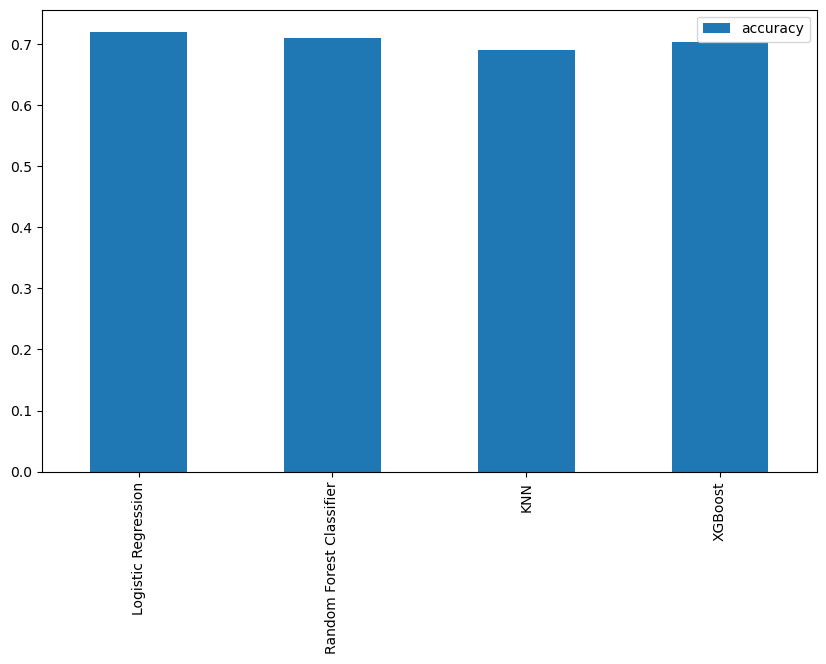

In [44]:
model_visual= pd.DataFrame(scores, index=["accuracy"])
model_visual.T.plot(kind="bar",
                  figsize=(10,6));
plt.show()

## Hyperparameter Tuning and Cross Validation
1. Tune model hyperparameters, and see which performs best
2. Perform cross-validation
3. Plot ROC curves
4. Make a confusion matrix
5. Get precision, recall and F1-score metrics
6. Find the most important model features

In [45]:
## Hyperparameter tuning with RandomizedSearchCV
# Create a hyperparameter grid for logisticRegression
log_reg_grid = {
    'classifier__C': np.logspace(-4, 4, 20),
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear']  # supports both l1 and l2
}
#Create a hyperparameter grid for randomclassifier
rf_grid ={"classifier__n_estimators" : np.arange(10,1000,50),
          "classifier__max_depth": [None, 3,5,10],
          "classifier__min_samples_split": np.arange(2,20,2),
          "classifier__min_samples_leaf": np.arange(1,20,2)}

xgb_grid = {
    "classifier__n_estimators": [100, 200, 300],
    "classifier__max_depth": [3, 5, 7, 10],
    "classifier__learning_rate": [0.01, 0.05, 0.1, 0.2],
    "classifier__subsample": [0.6, 0.8, 1.0],
    "classifier__colsample_bytree": [0.6, 0.8, 1.0],
    "classifier__scale_pos_weight": [1, 2, 5]  
}

In [23]:
# Tune LogisticRegression
np.random.seed(42)
pipe_log_reg = models["Logistic Regression"]
#Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(
    estimator=pipe_log_reg,
    param_distributions=log_reg_grid,
    n_iter=30,
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42,
    scoring='accuracy'
)

#Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['age',
                                                                                'monthly_income',
                                                                                'loan_amount',
                                                                                'loan_term',
                                                                                'credit_score',
                                                                                'previous_loans',
                                                                                'previous_defaults']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('encoder',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['gender',
                                                                                'employme...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'classifier__penalty': ['l1', 'l2'],
                                        'classifier__solver': ['liblinear']},
                   random_state=42, scoring='accuracy', verbose=1)

In [24]:
rs_log_reg.best_params_

{'classifier__solver': 'liblinear',
 'classifier__penalty': 'l2',
 'classifier__C': np.float64(0.012742749857031334)}

In [25]:
rs_log_reg.score(X_test,y_test)

0.71

In [46]:
# Tune XGBoost
np.random.seed(42)
pipe_xgb = models["XGBoost"]

In [47]:

rs_xgb = RandomizedSearchCV(
    estimator=pipe_xgb,
    param_distributions=xgb_grid,
    n_iter=30,
    cv=5,
    verbose=1,
    n_jobs=-1,
    scoring='f1',  # or 'recall', 'roc_auc'
    random_state=42
)

rs_xgb.fit(X_train, y_train)

print("Best Params:", rs_xgb.best_params_)
print("Best Score:", rs_xgb.best_score_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\Afolabi Ayomide\Desktop\sample_project_1\env\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:35:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Params: {'classifier__subsample': 0.6, 'classifier__scale_pos_weight': 2, 'classifier__n_estimators': 100, 'classifier__max_depth': 5, 'classifier__learning_rate': 0.01, 'classifier__colsample_bytree': 0.8}
Best Score: 0.7439162147534812


In [52]:
rs_xgb.score(X_test,y_test)

0.7317073170731707

In [26]:
## Tune RandomForestClassifier#
np.random.seed(42)
pipe_rs_rf= models["Random Forest Classifier"]

rs_rf = RandomizedSearchCV(
    estimator=pipe_rs_rf,
    param_distributions=rf_grid,
    n_iter=20,            # Try more for better results
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42,
    scoring='accuracy'    # Or use 'f1', 'roc_auc' depending on your goal
)

rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['age',
                                                                                'monthly_income',
                                                                                'loan_amount',
                                                                                'loan_term',
                                                                                'credit_score',
                                                                                'previous_loans',
                                                                                'previous_defaults']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('encoder',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['gender',
                                                                                'employme...
                   n_iter=20, n_jobs=-1,
                   param_distributions={'classifier__max_depth': [None, 3, 5,
                                                                  10],
                                        'classifier__min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'classifier__min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'classifier__n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   random_state=42, scoring='accuracy', verbose=1)

In [27]:
rs_rf.best_params_

{'classifier__n_estimators': np.int64(910),
 'classifier__min_samples_split': np.int64(18),
 'classifier__min_samples_leaf': np.int64(1),
 'classifier__max_depth': 10}

In [28]:
rs_rf.score(X_test,y_test)

0.72

## HYPERPARAMETER TUNING WITH GRID SEARCH

In [29]:
%%time
log_reg_grid = {
    'classifier__C': np.logspace(-4, 4, 20),
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear']
}
gs_log_reg = GridSearchCV(estimator=pipe_log_reg,
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)
# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 40 candidates, totalling 200 fits
CPU times: total: 9.77 s
Wall time: 9.86 s


In [30]:
gs_log_reg.best_params_

{'classifier__C': np.float64(0.012742749857031334),
 'classifier__penalty': 'l2',
 'classifier__solver': 'liblinear'}

In [31]:
gs_log_reg.score(X_test,y_test)

0.71

In [32]:
%%time
rf_grid = {
    "classifier__n_estimators": [100, 200, 300],
    "classifier__max_depth": [None, 5, 10],
    "classifier__min_samples_split": [2, 5, 10],
    "classifier__min_samples_leaf": [1, 2, 4]
}
gs_rf_rs = GridSearchCV(estimator=pipe_rs_rf,
                          param_grid=rf_grid,
                          cv=2,
                          verbose=True)
# Fit grid hyperparameter search model
gs_rf_rs.fit(X_train, y_train);


Fitting 2 folds for each of 81 candidates, totalling 162 fits
CPU times: total: 2min 20s
Wall time: 2min 21s


In [35]:
gs_rf_rs.score(X_test,y_test)

0.7166666666666667

In [48]:
xgb_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.05, 0.1],
    'classifier__subsample': [0.8, 1.0],
    'classifier__colsample_bytree': [0.8, 1.0],
    'classifier__scale_pos_weight': [1, 3]  # 3 if class 0 is ~3x class 1
}
gs_xgb = GridSearchCV(
    estimator=pipe_xgb,
    param_grid=xgb_grid,
    scoring='f1',  # Or 'recall', 'roc_auc', etc.
    cv=5,
    verbose=1,
    n_jobs=-1
)
gs_xgb.fit(X_train,y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


C:\Users\Afolabi Ayomide\Desktop\sample_project_1\env\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:40:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'monthly_income',
                                                                          'loan_amount',
                                                                          'loan_term',
                                                                          'credit_score',
                                                                          'previous_loans',
                                                                          'previous_defaults']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['gender',
                                                                          'employment_sta...
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'classifier__colsample_bytree': [0.8, 1.0],
                         'classifier__learning_rate': [0.05, 0.1],
                         'classifier__max_depth': [3, 5, 7],
                         'classifier__n_estimators': [100, 200],
                         'classifier__scale_pos_weight': [1, 3],
                         'classifier__subsample': [0.8, 1.0]},
             scoring='f1', verbose=1)

In [49]:
gs_xgb.score(X_test,y_test)

0.7173252279635258

In [36]:
## Check class distribution
print(y_train.value_counts(normalize=True))


defaulted
0    0.5775
1    0.4225
Name: proportion, dtype: float64


In [53]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = rs_xgb.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[ 92  66]
 [ 22 120]]
              precision    recall  f1-score   support

           0       0.81      0.58      0.68       158
           1       0.65      0.85      0.73       142

    accuracy                           0.71       300
   macro avg       0.73      0.71      0.70       300
weighted avg       0.73      0.71      0.70       300



In [54]:
rs_xgb.score(X_test,y_test)

0.7317073170731707

In [55]:
rs_xgb.best_params_

{'classifier__subsample': 0.6,
 'classifier__scale_pos_weight': 2,
 'classifier__n_estimators': 100,
 'classifier__max_depth': 5,
 'classifier__learning_rate': 0.01,
 'classifier__colsample_bytree': 0.8}

In [64]:
#Import cross val score
from sklearn.model_selection import cross_val_score

# Instantiate best model with best hyperparameters (found with RandomizedSearchCV)
pipe_xgb = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", XGBClassifier(
        subsample=0.6,
        scale_pos_weight=2,
        n_estimators=100,
        max_depth=5,
        learning_rate=0.01,
        colsample_bytree=0.8,
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    ))
])


Now we've got an instantiated classifier, let's find some cross-validated metrics.

In [65]:
%%time

# Cross-validated accuracy score
cv_acc = cross_val_score(pipe_xgb,
                         X,
                         y,
                         cv=5, 
                         scoring="accuracy") 
cv_acc

C:\Users\Afolabi Ayomide\Desktop\sample_project_1\env\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:15:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Afolabi Ayomide\Desktop\sample_project_1\env\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:15:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Afolabi Ayomide\Desktop\sample_project_1\env\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:15:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Afolabi Ayomide\Desktop\sample_project_1\env\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:15:46] WARNING: C:\actions-r

CPU times: total: 2.7 s
Wall time: 1.05 s


C:\Users\Afolabi Ayomide\Desktop\sample_project_1\env\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:15:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


array([0.73333333, 0.70666667, 0.72      , 0.65333333, 0.70666667])

In [66]:
cv_acc = np.mean(cv_acc)
cv_acc

np.float64(0.704)

In [68]:
# Cross-validated precision score
cv_precision = np.mean(cross_val_score(pipe_xgb,
                                       X,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring
cv_precision


C:\Users\Afolabi Ayomide\Desktop\sample_project_1\env\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:17:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Afolabi Ayomide\Desktop\sample_project_1\env\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:17:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Afolabi Ayomide\Desktop\sample_project_1\env\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:17:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Afolabi Ayomide\Desktop\sample_project_1\env\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:17:11] WARNING: C:\actions-r

np.float64(0.6041358608900106)

In [69]:
cv_recall = np.mean(cross_val_score(pipe_xgb,
                                       X,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="recall")) # precision as scoring
cv_recall


C:\Users\Afolabi Ayomide\Desktop\sample_project_1\env\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:18:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Afolabi Ayomide\Desktop\sample_project_1\env\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:18:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Afolabi Ayomide\Desktop\sample_project_1\env\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:18:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Afolabi Ayomide\Desktop\sample_project_1\env\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:18:11] WARNING: C:\actions-r

np.float64(0.9198807394156232)

In [70]:
cv_f1 = np.mean(cross_val_score(pipe_xgb,
                                X,
                                y,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring
cv_f1

C:\Users\Afolabi Ayomide\Desktop\sample_project_1\env\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:18:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Afolabi Ayomide\Desktop\sample_project_1\env\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:18:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Afolabi Ayomide\Desktop\sample_project_1\env\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:18:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Afolabi Ayomide\Desktop\sample_project_1\env\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:18:45] WARNING: C:\actions-r

np.float64(0.729154360166864)

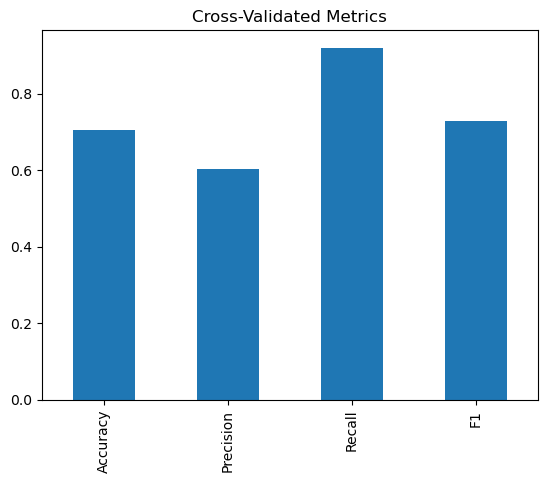

In [72]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);
plt.savefig("CrossValidated.png")
plt.show()

## SAVE THE MODEL

In [74]:
import joblib
joblib.dump(rs_xgb, 'final_model.pkl') 

['final_model.pkl']